<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Lecture_code/L3-overfitting-underfitting.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; for interacting with the code


---
# Lecture notes - Overfitting and underfitting
---

This is the lecture note for **overfitting and underfitting**

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to overfitting and underfitting. I encourage you to read further about overfitting and underfitting. </p>

Read more:

- [Overfitting wikipedia](https://en.wikipedia.org/wiki/Overfitting)
- [Underfitting vs overfitting sklearn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)
- [Polynomial regression](https://en.wikipedia.org/wiki/Polynomial_regression)
- [PolynomialFeatures sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
- [6.3.7 Generating polynomial features](https://scikit-learn.org/stable/modules/preprocessing.html#polynomial-features)
- [Bias-variance tradeoff towards datascience](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229)
- [Bias-variance tradeoff wikipedia](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff)
---


In [29]:
import numpy as np 
import matplotlib.pyplot as plt 

#plt.style.use("seaborn-white")

---
## Simulate data

Simulate from a 2nd order polynomial with Gaussian noise i.e. 

$$y = a_0 + a_1x + a_2x^2 + \epsilon ,$$ 
where $\epsilon \sim \mathcal{N(0,1)}$

<Axes: title={'center': '$y = x^2 + 0.5x + 3 + \\epsilon$'}>

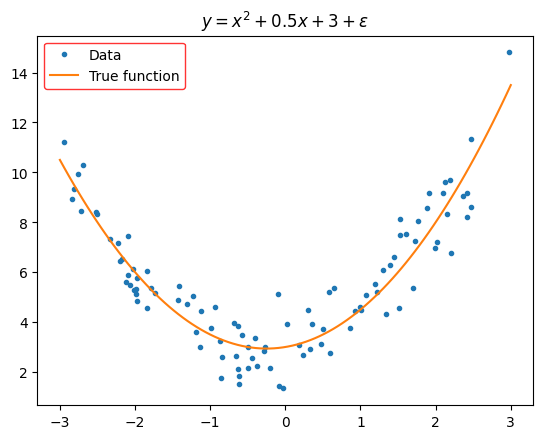

In [30]:
samples = 100
X = np.random.uniform(-3,3, (samples,1))
f = lambda x: x**2 + .5*x + 3 
y = f(X)+np.random.randn(samples,1)

def draw_data():
    fig = plt.figure(dpi = 100)
    ax = plt.axes()
    ax.plot(X,y, '.', label="Data")

    x = np.linspace(-3,3, samples)
    ax.plot(x, f(x), label = "True function")

    ax.set(title=r"$y = x^2 + 0.5x + 3 + \epsilon$")
    ax.legend(edgecolor="r")

    return ax

draw_data()

---

## Polynomial regression

Polynomial regression fits a polynomial of order $n$ to model the relationship between independent variable $x$ and dependent variable $y$. The polynomial regression model in general:

$$y = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n + \epsilon $$

It is linear in terms of the unknown parameters $\beta_i$, and can be expressed in matrix form and solved using OLS normal equation as we did for multiple linear regression. In fact polynomial regression is a special case of multiple linear regression.

$$
\begin{pmatrix}
 y_1\\
 y_2\\
 \vdots\\
 y_n\\
\end{pmatrix} =
\begin{pmatrix}
 1&  x_1& x_1^2  &\dots & x_1^m \\
 1&  x_2& x_2^2 & \dots & x_2^m\\
 \vdots&\vdots  &\vdots  &\ddots & \vdots\\
 1& x_n & x_n^2 & \dots & x_n^m\\
\end{pmatrix}
\begin{pmatrix}
 \beta_0\\
 \beta_1\\
 \vdots\\
 \beta_m\\
\end{pmatrix} + 

\begin{pmatrix}
 \epsilon_0\\
 \epsilon_1\\
 \vdots\\
 \epsilon_n\\
\end{pmatrix}
$$

Using ```sklearn.preprocessing.PolynomialFeatures``` we can feature engineer new features that previously didn't exist. It creates a feature matrix that represent polynomial combinations. For example $X = (X_1, X_2)$ would be transformed to ($1, X_1, X_2, X_1^2, X_2^2, X_1X_2, X_2^2)$ using degree 2, if bias is included, if bias is excluded 1 disappears.

In [31]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, include_bias=True)

poly_features = poly.fit_transform(X)
poly_features[:4]


array([[ 1.        ,  1.18917792,  1.41414413],
       [ 1.        , -2.8447716 ,  8.09272545],
       [ 1.        , -1.40986058,  1.98770686],
       [ 1.        , -2.71653674,  7.37957187]])

In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(poly_features, y)
model.coef_

array([[0.        , 0.52576148, 1.00460368]])

In [33]:
model.intercept_

array([3.01083445])

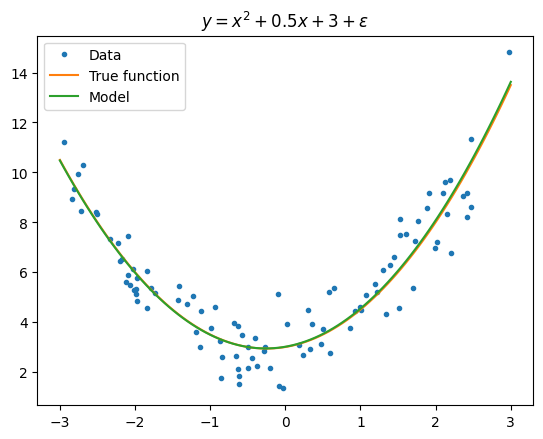

In [34]:
x = np.linspace(-3,3, samples)
x_poly_features = poly.transform(x.reshape(-1,1))
pred = model.predict(x_poly_features)

ax = draw_data()
ax.plot(x, pred, label = "Model")
ax.legend();

---
## Underfitting

Underfitting is when a model is too simple to represent the data accurately. 

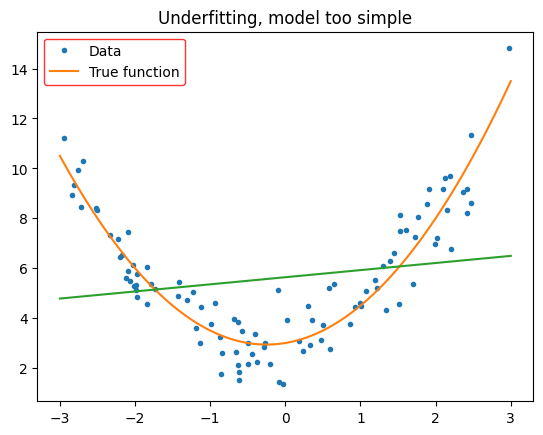

In [35]:
model = LinearRegression()
model.fit(X,y)
ax = draw_data()
ax.plot(x, model.predict(x.reshape(-1,1)))
ax.set(title="Underfitting, model too simple");

---
## Overfitting

Model too complicated, and fitted too much to the data. Complicated model (high variance) risk to fit to noise in training data, which make them generalize worse. Overfitting usually occurs when there is too small traning set, and/or it is not representative for testing data.

(100, 30)


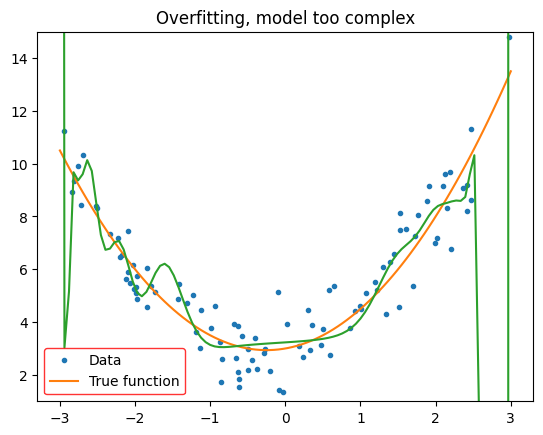

In [36]:
poly_model_30 = PolynomialFeatures(30, include_bias=False)
X_features = poly_model_30.fit_transform(X)
print(X_features.shape)

model = LinearRegression()
model.fit(X_features, y)

x = np.linspace(-3,3, samples)

x_poly_features = poly_model_30.transform(x.reshape(-1,1))
pred = model.predict(x_poly_features)

ax = draw_data()
ax.plot(x, pred)
ax.set(title="Overfitting, model too complex", ylim=[1,15]);

# The model captures more points in training data but can't generalize to test data 

---
## Choose a model

Note that we are not always able to plot the data and its corresponding graphs as our data might be high dimensional. In order to choose correct model we can use a cost/loss function to keep track of the error for different models (different degrees of polynomial).

In [37]:
from sklearn.model_selection import train_test_split

# we increase number of simulated samples 
samples = 10000
X = np.random.uniform(-3,3, (samples,1))
f = lambda x: x**4 + x**2 + .5*x + 3 # change model to 3rd degree polynomial
y = f(X)+np.random.randn(samples,1)

print(f"X.shape: {X.shape}, y.shape: {y.shape}")

X.shape: (10000, 1), y.shape: (10000, 1)


### Train|Validation|Test split

We split our data set into 
- training set
- validation set
- testing set

Reason for this split is to use the validation data for choosing the degree of the polynomial (a hyperparameter)

In [38]:
# use train_test_split twice to obtain train|val|test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)
    
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((6700, 1), (6700, 1), (1650, 1), (1650, 1), (1650, 1), (1650, 1))

### Fit model and predict

In [39]:
from sklearn.metrics import root_mean_squared_error

RMSE_val = []

for degree in range(1,100):
    model_poly = PolynomialFeatures(degree, include_bias=False) # bias False as LinearRegression has intercept by default
    train_features = model_poly.fit_transform(X_train)
    val_features = model_poly.transform(X_val)
    model_lin_reg = LinearRegression()

    model_lin_reg.fit(train_features, y_train)

    y_pred_val = model_lin_reg.predict(val_features)
    
    RMSE_val.append(root_mean_squared_error(y_val, y_pred_val))

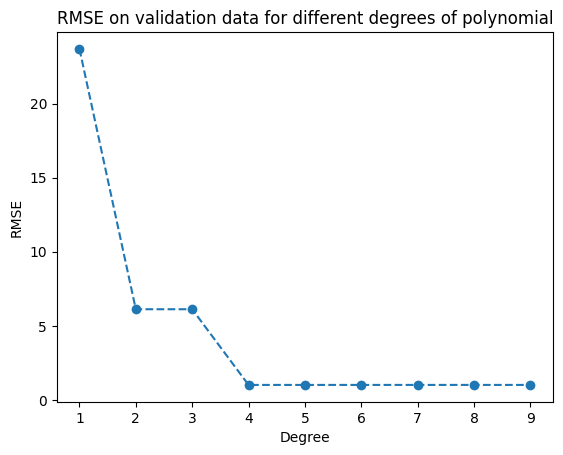

In [40]:
fig, ax = plt.figure(), plt.axes()

ax.plot(range(1,10), RMSE_val[:9],'--o', label = "Validation")
ax.set(xlabel = "Degree", ylabel = "RMSE", title = "RMSE on validation data for different degrees of polynomial");
# we see that from degreen 3 the error is low, and it doesn't change much when going higher degrees
# hence we would choose degree 3 here, which corresponds to our simulated polynomial degree. 
# this type of plot is called elbow plot.
# now we could move on to train the model using degree 3 and then predict on testing data

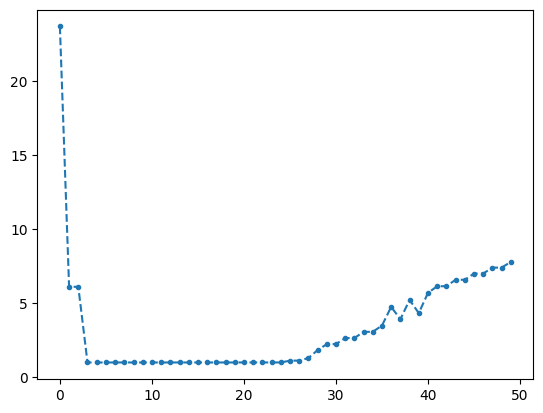

In [41]:
ax = plt.axes()

# try much higher degree polynomials and see that error actually increases 
# note that this might happen much faster for real data 
ax.plot(range(50), RMSE_val[:50],'--.', label = "Validation");

---
## Bias-Variance Trade-off

A models generalization error is bias + variance + irreducible error

- bias - difference between average prediction and correct value. 
    - high bias, pay little attention to data, 
    - oversimplifies and underfits.
- variance - spread of our data
    - many degrees of freedom  -> high variance -> overfit to data
- irreducible error - due to noise of data, only way to decrease this is to clean the data itself.

Higher model complexity -> higher variance, lower bias

Lower model complexity -> lower variance, higher bias

The goal is to choose a model that is complex enough not to underfit, but not too complex to overfit. Need to find a balance between bias and variance. 

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---
